# EDA

## Secondary Consumption ONLY

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
s2022 = pd.read_excel('secondary2022.xlsx')
print(s2022)

          Date  Donation  RevDonation  CATCold Drinks  RevCATCold Drinks  \
0   2022-01-03         0          0.0             241             324.04   
1   2022-01-04         0          0.0             126             168.22   
2   2022-01-05         0          0.0              77             105.02   
3   2022-01-06         0          0.0               0               0.00   
4   2022-01-07         0          0.0               0               0.00   
..         ...       ...          ...             ...                ...   
358 2022-12-27         0          0.0             110             181.64   
359 2022-12-28         0          0.0              59             100.23   
360 2022-12-29         0          0.0             213             356.48   
361 2022-12-30         0          0.0             211             351.10   
362 2022-12-31         0          0.0              85             141.23   

     CATHot Drinks  RevCATHot Drinks  CATIce Cream  RevCATIce Cream  \
0              3

In [33]:
print(s2022.dtypes)

Date                                  datetime64[ns]
Donation                                       int64
RevDonation                                  float64
CATCold Drinks                                 int64
RevCATCold Drinks                            float64
CATHot Drinks                                  int64
RevCATHot Drinks                             float64
CATIce Cream                                   int64
RevCATIce Cream                              float64
CATPreparedFood                                int64
RevCATPreparedFood                           float64
CATOrder Options                               int64
RevCATOrder Options                          float64
CATPurchased Food Crisps                       int64
RevCATPurchased Food Crisps                  float64
CATPurchased Food Standard Rate                int64
RevCATPurchased Food Standard Rate           float64
CTPurchased Food Zero                          int64
RevCTPurchased Food Zero                     f

In [34]:
# Split the columns into three parts: catering, retail, and revenue
catering_cols = s2022.filter(regex='^CAT')
retail_cols = s2022.filter(regex='^RT')
revenue_cols = s2022.filter(regex='^Rev')
catering_revenue_cols = s2022.filter(regex='^RevCAT')
retail_revenue_cols = s2022.filter(regex='^RevRT')

print("Catering columns:")
print(catering_cols.columns.tolist())
print()

print("Retail columns:")
print(retail_cols.columns.tolist())
print()

print("Revenue columns:")
print(revenue_cols.columns.tolist())

print("Catering revenue columns:")
print(catering_revenue_cols.columns.tolist())
print()

print("Retail revenue columns:")
print(retail_revenue_cols.columns.tolist())

Catering columns:
['CATCold Drinks', 'CATHot Drinks', 'CATIce Cream', 'CATPreparedFood', 'CATOrder Options', 'CATPurchased Food Crisps', 'CATPurchased Food Standard Rate']

Retail columns:
['RTSweets', 'RTRetail', 'RTBooks', 'RTGuideBook', 'RTCampaign', 'RTFWChildren ', 'RTGifts (Food ZR)', 'RTGifts', 'RTBespoke', 'RTClothing', 'RTJewellery', 'RTPlush', 'RTChildren clothes', 'RTPostage', 'RTBattery']

Revenue columns:
['RevDonation', 'RevCATCold Drinks', 'RevCATHot Drinks', 'RevCATIce Cream', 'RevCATPreparedFood', 'RevCATOrder Options', 'RevCATPurchased Food Crisps', 'RevCATPurchased Food Standard Rate', 'RevCTPurchased Food Zero', 'RevRTSweets', 'RevRTRetail', 'RevRTBooks', 'RevRTGuideBook', 'RevRTCampaign', 'RevRTFWChildren ', 'RevRTGifts (Food ZR)', 'RevRTGifts', 'RevRTBespoke', 'RevRTClothing', 'RevRTJewellery', 'RevRTPlush', 'RevRTChildren clothes', 'RevRTPostage', 'RevRTBattery', 'RevTotal']
Catering revenue columns:
['RevCATCold Drinks', 'RevCATHot Drinks', 'RevCATIce Cream', 'R

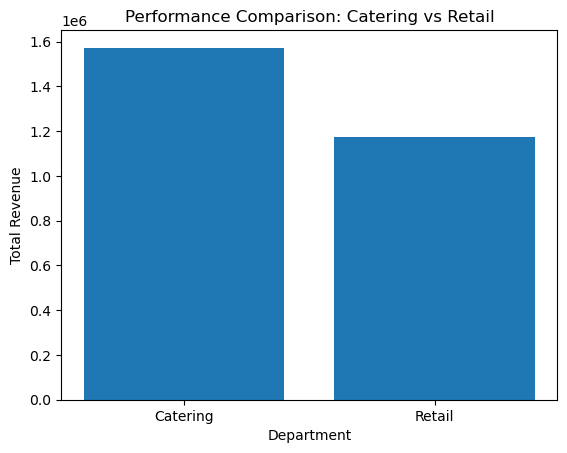

In [35]:
catering_revenue = s2022.filter(regex='^RevCAT').sum().sum()
retail_revenue = s2022.filter(regex='^RevRT').sum().sum()

departments = ['Catering', 'Retail']
revenues = [catering_revenue, retail_revenue]

plt.bar(departments, revenues)
plt.xlabel('Department')
plt.ylabel('Total Revenue')
plt.title('Performance Comparison: Catering vs Retail')
plt.show()


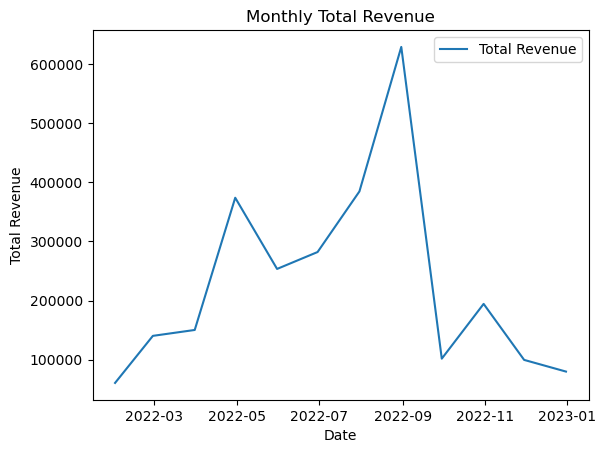

In [36]:
# Resample the DataFrame to a monthly frequency
monthly_total_revenue = s2022.resample('M', on='Date')['RevTotal'].sum()


plt.plot(monthly_total_revenue.index, monthly_total_revenue, label='Total Revenue')

plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Monthly Total Revenue')
plt.legend()
plt.show()


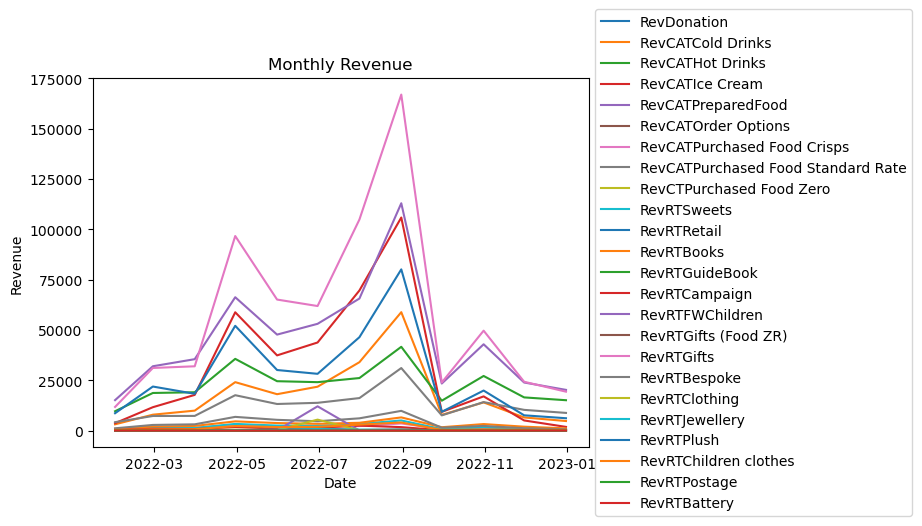

In [37]:
rev_columns = [col for col in s2022.columns if col.startswith('Rev') and col != 'RevTotal']

monthly_data = s2022.resample('M', on='Date')[rev_columns].sum()

for col in rev_columns:
    plt.plot(monthly_data.index, monthly_data[col], label=col)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # position the legend outside the plot area
plt.show()



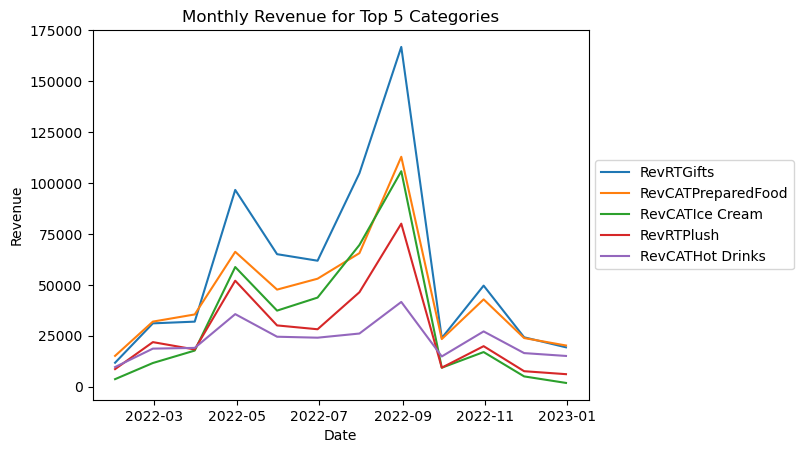

In [38]:
rev_columns = [col for col in s2022.columns if col.startswith('Rev') and col != 'RevTotal']

monthly_data = s2022.resample('M', on='Date')[rev_columns].sum()

total_revenue = monthly_data.sum()

# Sort the categories by total revenue and select the top 5
top_rev_columns = total_revenue.sort_values(ascending=False).head(5).index

for col in top_rev_columns:
    plt.plot(monthly_data.index, monthly_data[col], label=col)

plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Monthly Revenue for Top 5 Categories')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # position the legend outside the plot area
plt.show()



In [39]:
peak_date = monthly_data.idxmax()
print(peak_date)

RevDonation                          2022-03-31
RevCATCold Drinks                    2022-08-31
RevCATHot Drinks                     2022-08-31
RevCATIce Cream                      2022-08-31
RevCATPreparedFood                   2022-08-31
RevCATOrder Options                  2022-08-31
RevCATPurchased Food Crisps          2022-08-31
RevCATPurchased Food Standard Rate   2022-08-31
RevCTPurchased Food Zero             2022-06-30
RevRTSweets                          2022-08-31
RevRTRetail                          2022-04-30
RevRTBooks                           2022-08-31
RevRTGuideBook                       2022-08-31
RevRTCampaign                        2022-07-31
RevRTFWChildren                      2022-06-30
RevRTGifts (Food ZR)                 2022-06-30
RevRTGifts                           2022-08-31
RevRTBespoke                         2022-08-31
RevRTClothing                        2022-06-30
RevRTJewellery                       2022-06-30
RevRTPlush                           202

In [40]:
#add binary variables for each items when peak
items = peak_date.index
for item in items:
    peak_time = peak_date[item]
    monthly_data[item+'_peak'] = monthly_data.index.map(lambda x: 1 if x == peak_time else 0)
monthly_data

,RevDonation,RevCATCold Drinks,RevCATHot Drinks,RevCATIce Cream,RevCATPreparedFood,RevCATOrder Options,RevCATPurchased Food Crisps,RevCATPurchased Food Standard Rate,RevCTPurchased Food Zero,RevRTSweets,...,RevRTFWChildren _peak,RevRTGifts (Food ZR)_peak,RevRTGifts_peak,RevRTBespoke_peak,RevRTClothing_peak,RevRTJewellery_peak,RevRTPlush_peak,RevRTChildren clothes_peak,RevRTPostage_peak,RevRTBattery_peak
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-31,0.00,3105.05,9614.88,3682.00,15119.96,6.80,668.45,4176.90,25.66,759.23,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,0.00,7897.34,18677.60,11613.86,31950.21,9.80,1243.32,7246.51,101.15,1776.85,...,0,0,0,0,0,0,0,0,1,0
2022-03-31,262.25,9907.11,19034.06,17725.87,35464.82,1.00,1333.21,7287.03,163.96,1308.64,...,0,0,0,0,0,0,0,0,0,0
2022-04-30,0.00,24054.43,35625.08,58755.43,66235.25,0.00,2890.03,17569.91,251.87,3312.01,...,0,0,0,0,0,0,0,0,0,0
2022-05-31,0.00,18067.96,24524.26,37348.69,47667.55,0.00,1870.65,13206.05,128.02,2495.96,...,0,0,0,0,0,0,0,0,0,1
2022-06-30,0.00,21795.85,24049.70,43750.94,53026.43,0.00,1821.01,13790.28,389.63,2360.89,...,1,1,0,0,1,1,0,0,0,0
2022-07-31,0.00,33970.58,26095.24,69589.95,65583.14,0.00,2241.90,16143.57,0.00,3299.75,...,0,0,0,0,0,0,0,0,0,0
2022-08-31,0.00,58813.29,41609.84,105820.49,112908.43,11.92,3528.25,31057.46,0.00,5021.34,...,0,0,1,1,0,0,1,1,0,0
2022-09-30,0.00,7790.42,14836.98,9302.49,23372.02,9.67,784.08,7556.88,0.00,749.43,...,0,0,0,0,0,0,0,0,0,0


## Weather & Secondary Consumption Analysis

In [41]:
w2022 = pd.read_excel('2022weather.xlsx')
print(w2022)

          Date  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
0   2022-01-03      9.6      7.8   8.6           7.5           4.8        6.1   
1   2022-01-04      7.7      2.2   4.3           5.2          -1.8        0.7   
2   2022-01-05      5.5      1.4   3.0           2.8          -0.9        0.6   
3   2022-01-06      7.3      0.2   4.2           4.0          -1.7        1.2   
4   2022-01-07      5.9      3.3   4.4           3.5          -1.2        0.6   
..         ...      ...      ...   ...           ...           ...        ...   
358 2022-12-27     10.4      5.6   8.3          10.4           1.8        4.8   
359 2022-12-28     11.2      8.6   9.8          11.2           4.2        7.0   
360 2022-12-29      8.8      6.3   7.3           4.2           1.7        3.1   
361 2022-12-30     11.2      8.3   9.8          11.2           4.0        7.3   
362 2022-12-31     11.7      9.4  10.6          11.7           5.5        9.6   

      dew  humidity  precip

In [42]:
print(w2022.dtypes)

Date                datetime64[ns]
tempmax                    float64
tempmin                    float64
temp                       float64
feelslikemax               float64
feelslikemin               float64
feelslike                  float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                   int64
precipcover                float64
preciptype                  object
snow                         int64
snowdepth                    int64
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
dtype: object


### Retail departments

In [43]:
retail_revenue_col_names = retail_revenue_cols.columns.tolist()

retail_revenue_col_names.append('Date')

s2022_retail = s2022[retail_revenue_col_names]

print(s2022_retail.head())


   RevRTSweets  RevRTRetail  RevRTBooks  RevRTGuideBook  RevRTCampaign  \
0        60.78          0.0       38.04             0.0          20.77   
1        49.82          0.0       29.96             0.0          22.92   
2        50.82          0.0       44.53             0.0           1.98   
3         0.00          0.0        0.00             0.0           0.00   
4         0.00          0.0        0.00             0.0           0.00   

   RevRTFWChildren   RevRTGifts (Food ZR)  RevRTGifts  RevRTBespoke  \
0               0.0                   0.0      907.94         78.91   
1               0.0                   0.0      632.01         60.07   
2               0.0                   0.0      566.64         92.98   
3               0.0                   0.0        0.00          0.00   
4               0.0                   0.0        0.00          0.00   

   RevRTClothing  RevRTJewellery  RevRTPlush  RevRTChildren clothes  \
0           0.00             0.0      943.51             

In [44]:
# Merge s2022_retail and w2022
mergedretailrev = pd.merge(s2022_retail, w2022, on='Date')

print(mergedretailrev.head())

   RevRTSweets  RevRTRetail  RevRTBooks  RevRTGuideBook  RevRTCampaign  \
0        60.78          0.0       38.04             0.0          20.77   
1        49.82          0.0       29.96             0.0          22.92   
2        50.82          0.0       44.53             0.0           1.98   
3         0.00          0.0        0.00             0.0           0.00   
4         0.00          0.0        0.00             0.0           0.00   

   RevRTFWChildren   RevRTGifts (Food ZR)  RevRTGifts  RevRTBespoke  \
0               0.0                   0.0      907.94         78.91   
1               0.0                   0.0      632.01         60.07   
2               0.0                   0.0      566.64         92.98   
3               0.0                   0.0        0.00          0.00   
4               0.0                   0.0        0.00          0.00   

   RevRTClothing  ...  snowdepth  windgust  windspeed  winddir  \
0           0.00  ...          0      57.9       23.9    242.5

In [45]:
mergedretailrev.columns

Index(['RevRTSweets', 'RevRTRetail', 'RevRTBooks', 'RevRTGuideBook',
       'RevRTCampaign', 'RevRTFWChildren ', 'RevRTGifts (Food ZR)',
       'RevRTGifts', 'RevRTBespoke', 'RevRTClothing', 'RevRTJewellery',
       'RevRTPlush', 'RevRTChildren clothes', 'RevRTPostage', 'RevRTBattery',
       'Date', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex'],
      dtype='object')

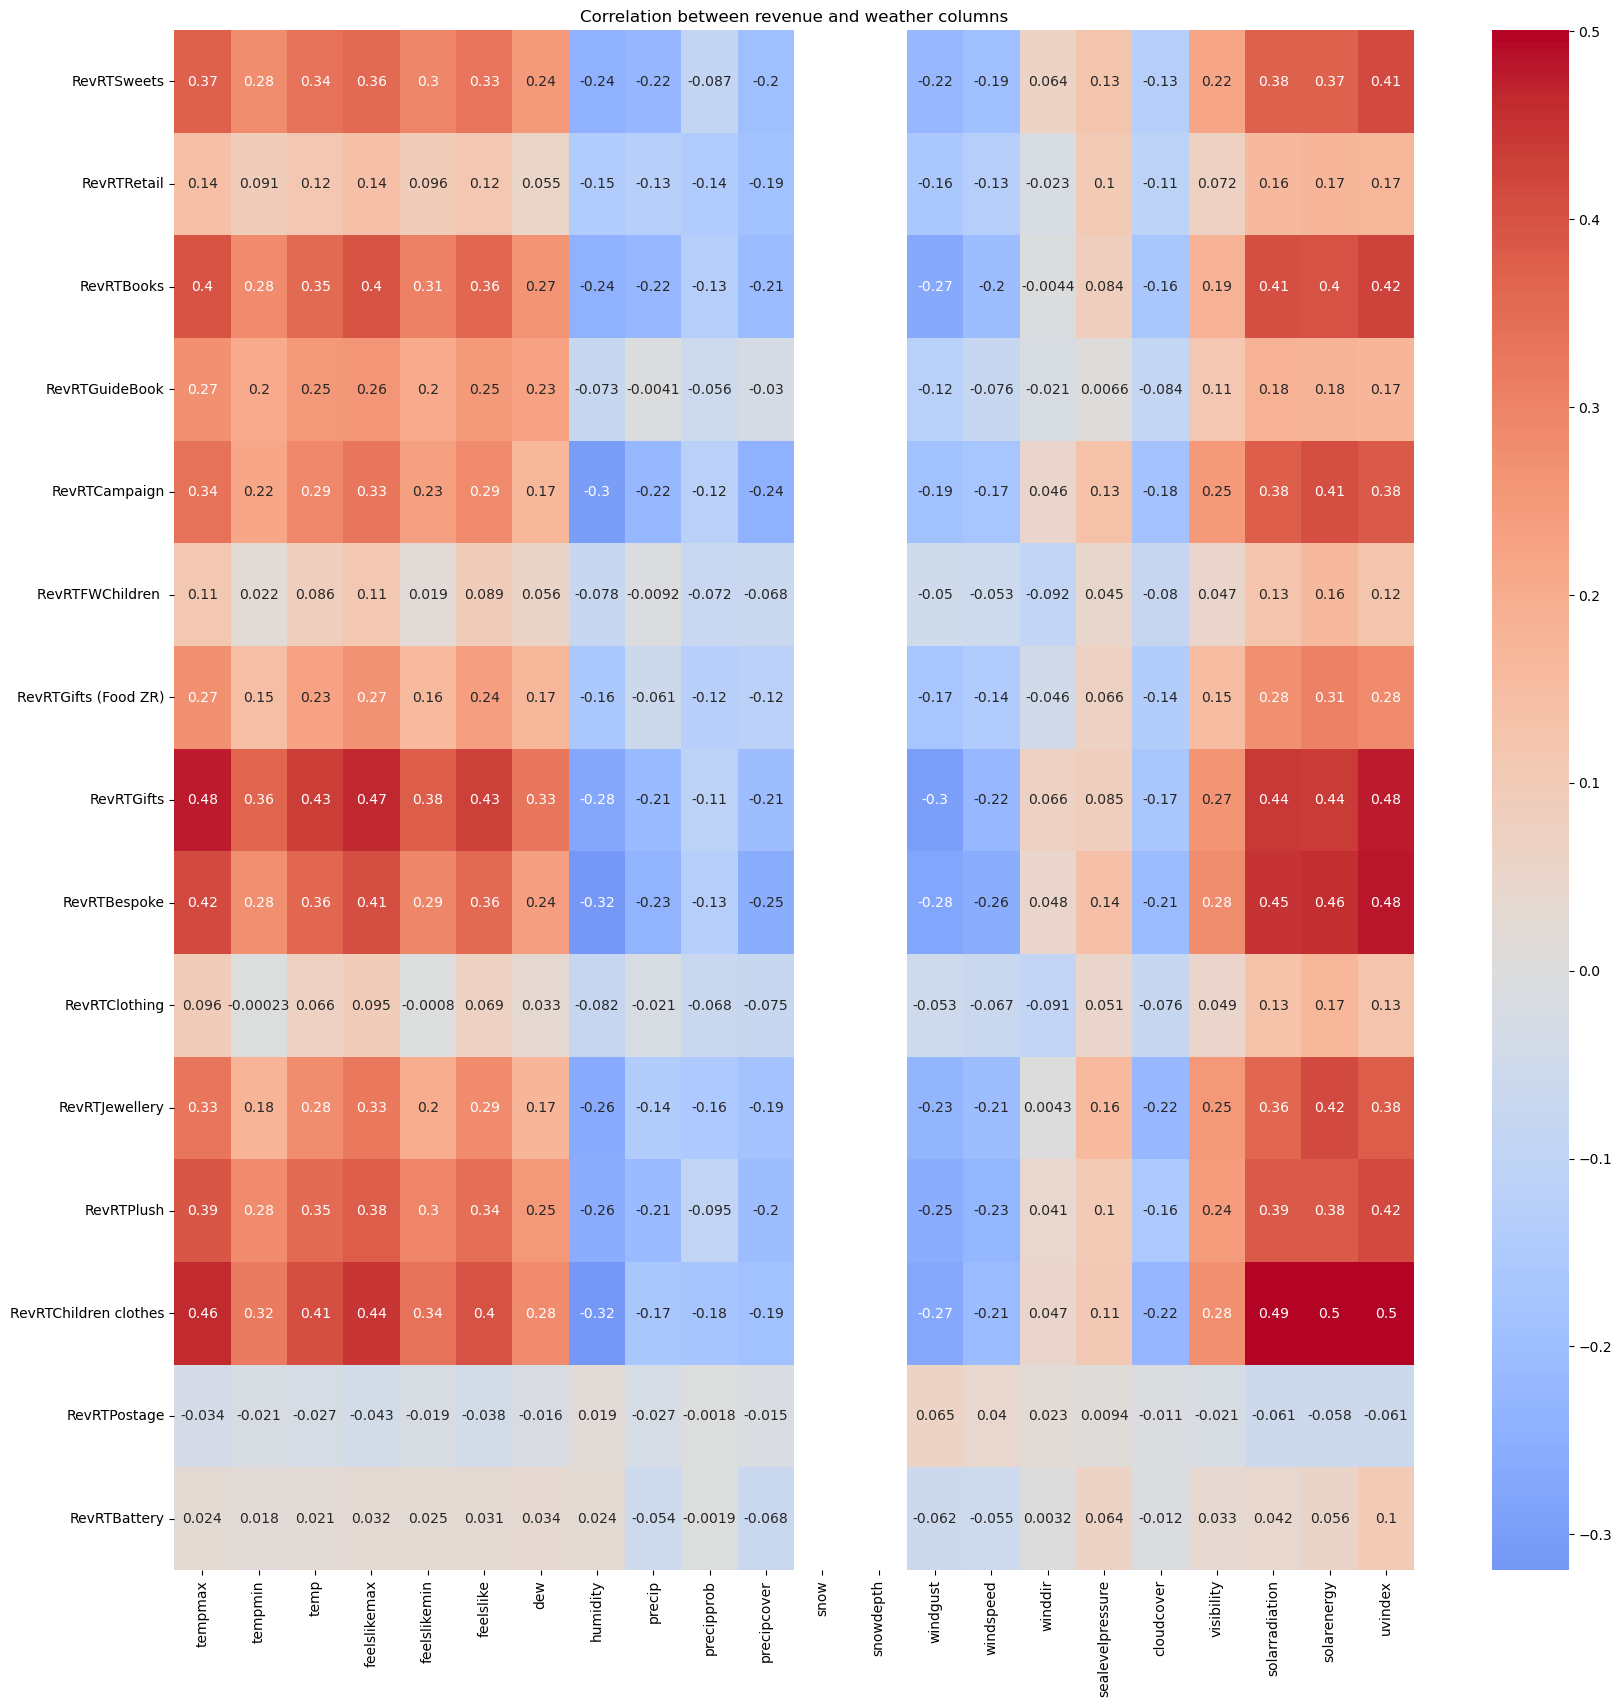

In [46]:
correlations = pd.DataFrame()
rev_cols = ['RevRTSweets', 'RevRTRetail', 'RevRTBooks', 'RevRTGuideBook',
       'RevRTCampaign', 'RevRTFWChildren ', 'RevRTGifts (Food ZR)',
       'RevRTGifts', 'RevRTBespoke', 'RevRTClothing', 'RevRTJewellery',
       'RevRTPlush', 'RevRTChildren clothes', 'RevRTPostage', 'RevRTBattery']
weather_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 
                'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 
                'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 
                'solarradiation', 'solarenergy', 'uvindex']
# Calculate the correlation between each pair of 'Rev' column and weather column
for rev_col in rev_cols:
    for weather_col in weather_cols:
        correlations.loc[rev_col, weather_col] = mergedretailrev[rev_col].corr(mergedretailrev[weather_col])

plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between revenue and weather columns')
plt.show()

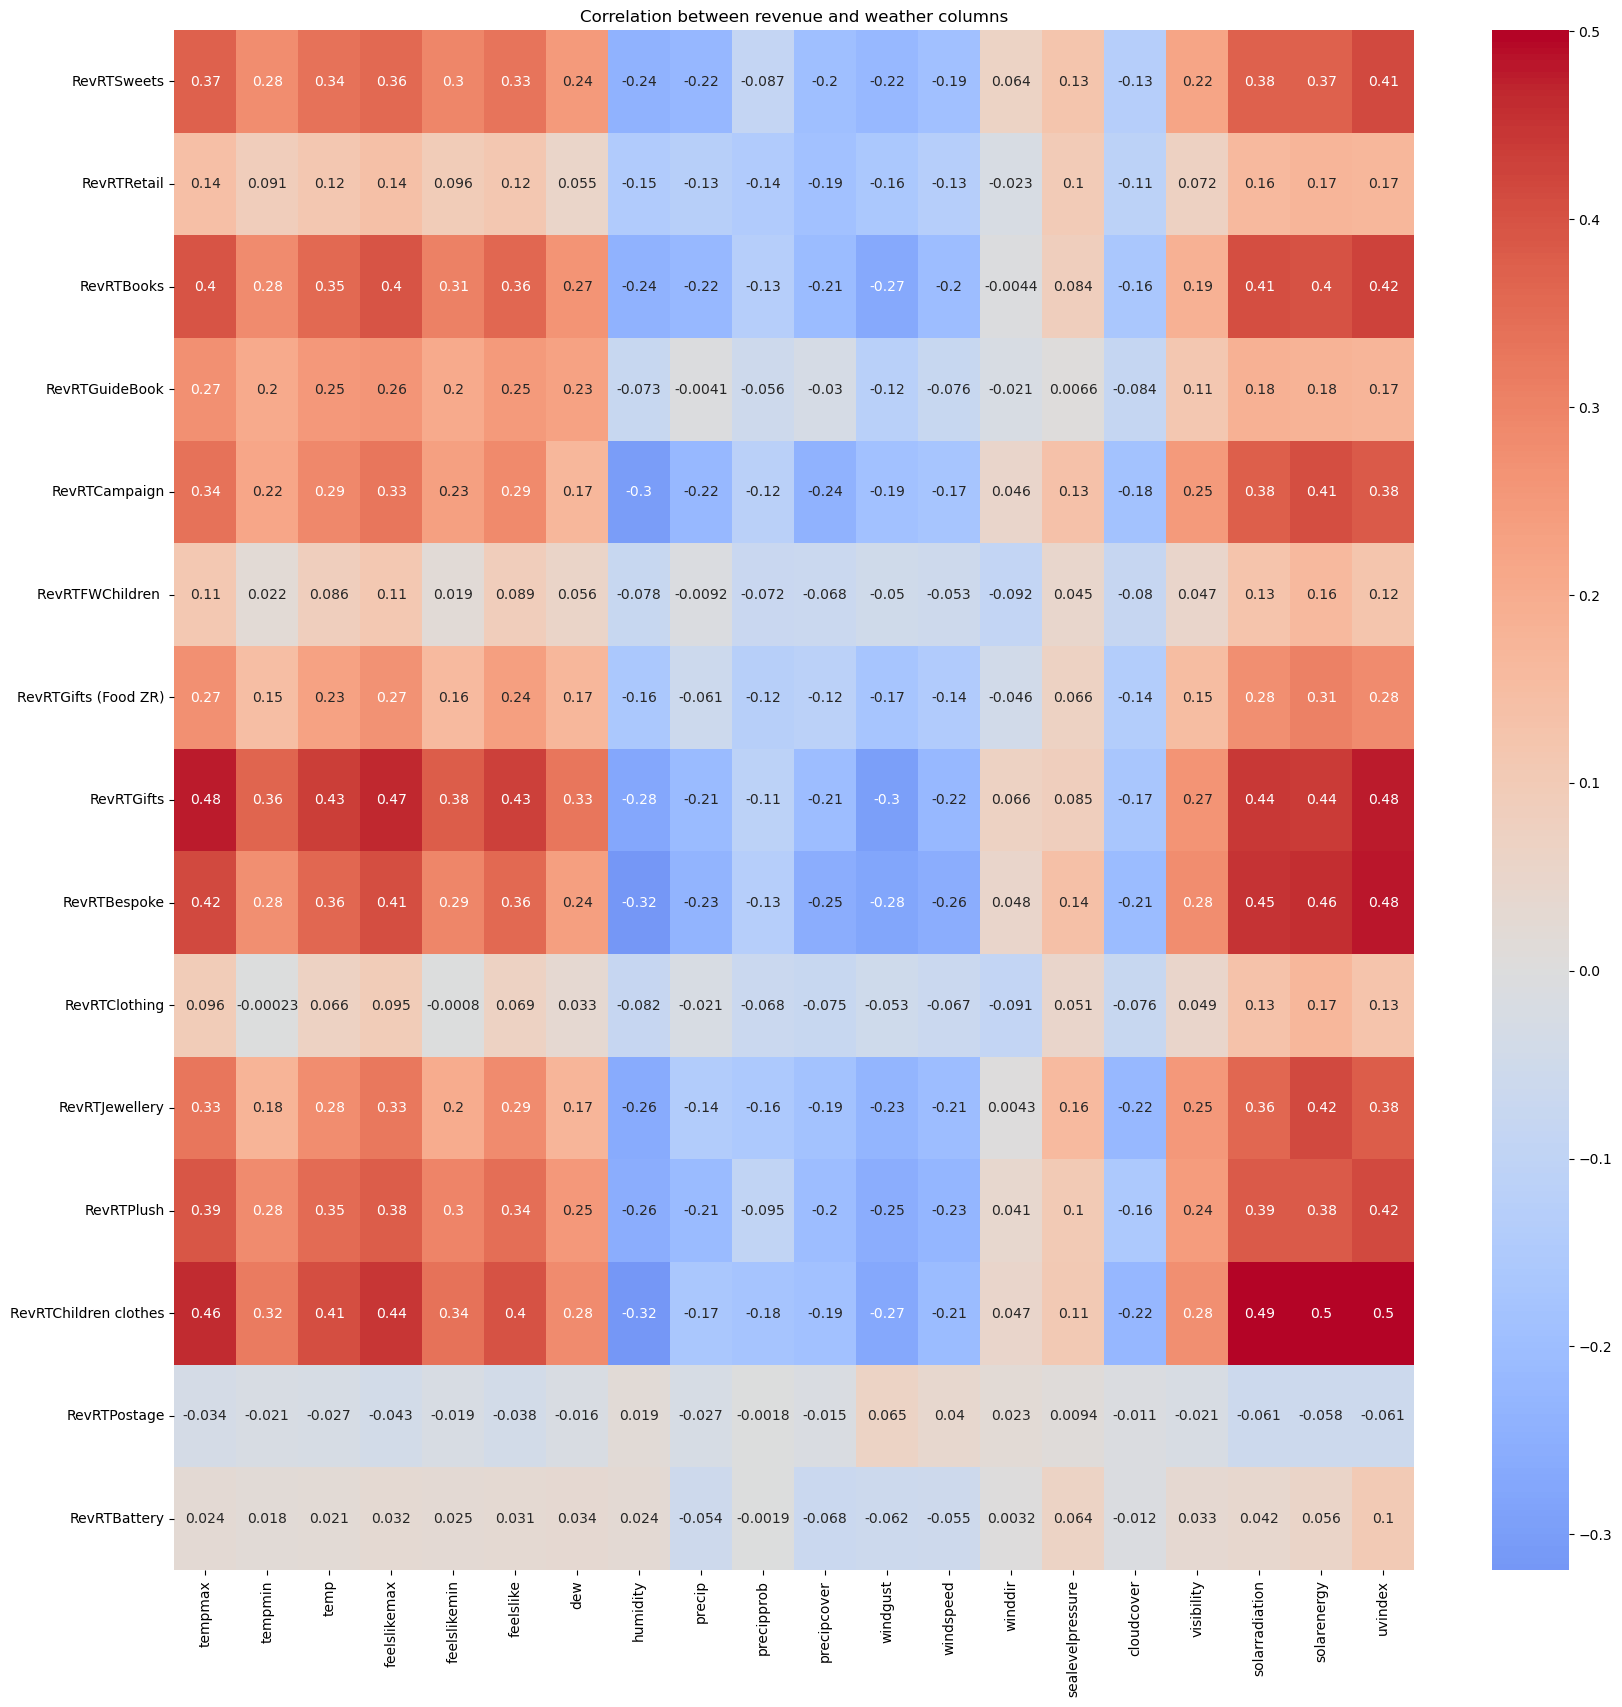

In [47]:
mergedretailrev = mergedretailrev.drop(['snow','snowdepth'],axis=1)
weather_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 
                'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                'precipcover', 'windgust', 'windspeed', 
                'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 
                'solarradiation', 'solarenergy', 'uvindex']
correlations = pd.DataFrame()
for rev_col in rev_cols:
    for weather_col in weather_cols:
        correlations.loc[rev_col, weather_col] = mergedretailrev[rev_col].corr(mergedretailrev[weather_col])

plt.figure(figsize=(20, 20))
sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between revenue and weather columns')
plt.show()

### Catering Department

In [48]:
catering_revenue_col_names = catering_revenue_cols.columns.tolist()

catering_revenue_col_names.append('Date')

s2022_catering = s2022[catering_revenue_col_names]

print(s2022_catering.head())


   RevCATCold Drinks  RevCATHot Drinks  RevCATIce Cream  RevCATPreparedFood  \
0             324.04            854.45           357.84             1533.15   
1             168.22            601.01           176.84              868.37   
2             105.02            531.47           126.46              582.99   
3               0.00              0.00             0.00                0.00   
4               0.00              0.00             0.00                0.00   

   RevCATOrder Options  RevCATPurchased Food Crisps  \
0                 0.50                        76.11   
1                 2.35                        38.54   
2                 0.50                        30.00   
3                 0.00                         0.00   
4                 0.00                         0.00   

   RevCATPurchased Food Standard Rate       Date  
0                              463.95 2022-01-03  
1                              270.34 2022-01-04  
2                              188.96 202

In [49]:
# Merge s2022_retail and w2022
mergedcateringrev = pd.merge(s2022_catering, w2022, on='Date')

print(mergedcateringrev.head())

   RevCATCold Drinks  RevCATHot Drinks  RevCATIce Cream  RevCATPreparedFood  \
0             324.04            854.45           357.84             1533.15   
1             168.22            601.01           176.84              868.37   
2             105.02            531.47           126.46              582.99   
3               0.00              0.00             0.00                0.00   
4               0.00              0.00             0.00                0.00   

   RevCATOrder Options  RevCATPurchased Food Crisps  \
0                 0.50                        76.11   
1                 2.35                        38.54   
2                 0.50                        30.00   
3                 0.00                         0.00   
4                 0.00                         0.00   

   RevCATPurchased Food Standard Rate       Date  tempmax  tempmin  ...  \
0                              463.95 2022-01-03      9.6      7.8  ...   
1                              270.34 2022-0

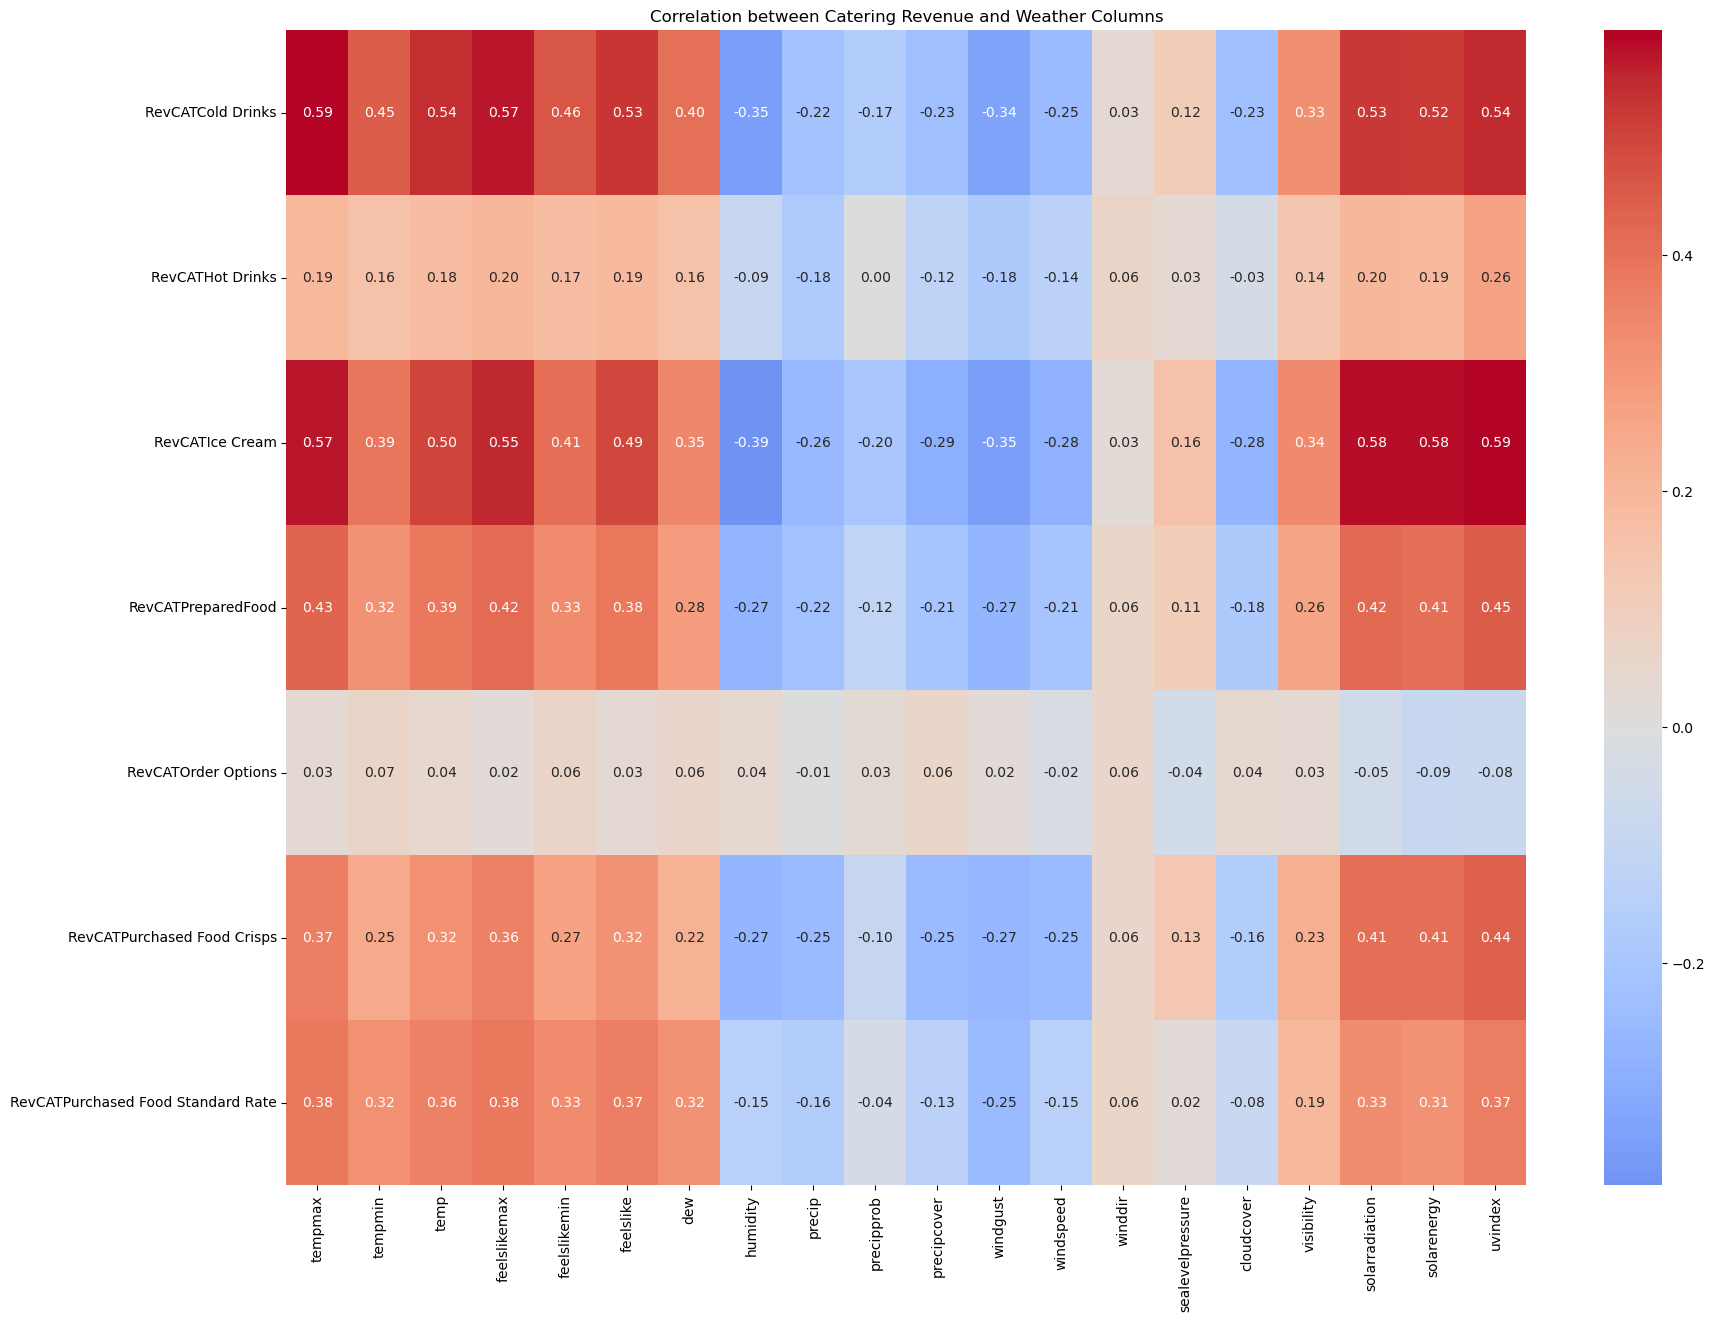

In [50]:
catering_rev_cols = [col for col in mergedcateringrev.columns if col.startswith('Rev')]

weather_cols = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 
                'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 
                'precipcover', 'windgust', 'windspeed', 
                'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 
                'solarradiation', 'solarenergy', 'uvindex']

catering_correlations = pd.DataFrame()

# Calculate the correlation between each pair of 'Rev' column and weather column
for rev_col in catering_rev_cols:
    for weather_col in weather_cols:
        catering_correlations.loc[rev_col, weather_col] = mergedcateringrev[rev_col].corr(mergedcateringrev[weather_col])

plt.figure(figsize=(20, 15))
sns.heatmap(catering_correlations, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation between Catering Revenue and Weather Columns')
plt.show()


## COVID impact on secondary consumption

Pre COVID - 2017-2020/3/23

Post COVID - 2021/04/11 - 2022

In [51]:
precovid = mergedcateringrev.copy()
precovid = precovid[(precovid['Date'] <= '2020-03-22')]

postcovid = mergedcateringrev.copy()

postcovid = postcovid[(postcovid['Date'] >= '2021-04-12')]

precovid.reset_index(drop=True, inplace=True)
postcovid.reset_index(drop=True, inplace=True)

In [52]:
precovid

,RevCATCold Drinks,RevCATHot Drinks,RevCATIce Cream,RevCATPreparedFood,RevCATOrder Options,RevCATPurchased Food Crisps,RevCATPurchased Food Standard Rate,Date,tempmax,tempmin,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex


In [53]:
postcovid#all date is in post covid so no need to analyze any more

,RevCATCold Drinks,RevCATHot Drinks,RevCATIce Cream,RevCATPreparedFood,RevCATOrder Options,RevCATPurchased Food Crisps,RevCATPurchased Food Standard Rate,Date,tempmax,tempmin,...,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,324.04,854.45,357.84,1533.15,0.50,76.11,463.95,2022-01-03,9.6,7.8,...,0,57.9,23.9,242.5,1009.0,81.3,16.3,33.9,1.1,1
1,168.22,601.01,176.84,868.37,2.35,38.54,270.34,2022-01-04,7.7,2.2,...,0,53.9,22.7,310.5,1004.4,68.2,25.1,53.6,2.0,1
2,105.02,531.47,126.46,582.99,0.50,30.00,188.96,2022-01-05,5.5,1.4,...,0,38.1,15.1,317.4,1017.4,52.6,31.3,17.3,0.7,0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-01-06,7.3,0.2,...,0,61.8,31.2,225.9,1016.1,78.2,24.1,26.0,0.9,1
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022-01-07,5.9,3.3,...,0,63.2,23.8,269.0,1013.4,62.4,25.3,35.7,1.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,181.64,501.86,33.03,784.64,0.00,17.24,272.64,2022-12-27,10.4,5.6,...,0,62.2,43.5,221.6,1018.6,85.2,16.0,56.4,2.0,1
359,100.23,255.63,41.95,438.77,0.00,11.12,184.07,2022-12-28,11.2,8.6,...,0,67.4,49.2,222.4,1001.3,96.8,10.4,30.6,0.9,1
360,356.48,1015.49,265.30,1646.21,0.00,47.19,571.20,2022-12-29,8.8,6.3,...,0,65.9,45.0,246.2,1002.6,68.6,18.5,66.5,2.3,2
361,351.10,548.01,147.99,1245.75,1.34,19.48,322.96,2022-12-30,11.2,8.3,...,0,65.6,45.1,207.2,995.4,92.2,16.1,52.4,1.6,1


#### Skewness analysis

In [54]:
skew_data = mergedcateringrev.copy()
skew_data = skew_data.drop(['snow', 'snowdepth'], axis=1)

/tmp/ipykernel_133707/725650228.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_data = skew_data.skew()


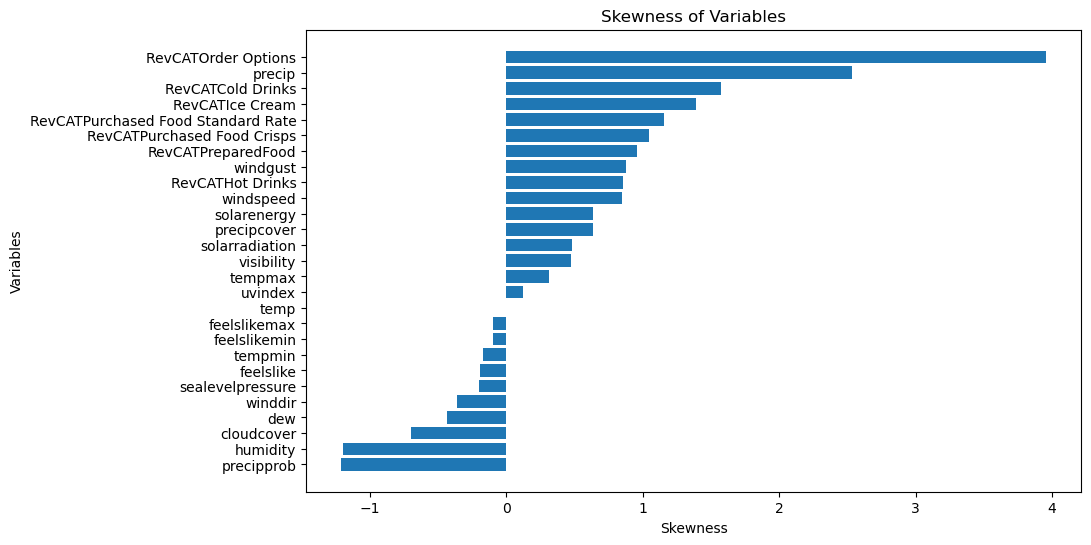

RevCATOrder Options                   3.952961
precip                                2.535202
RevCATCold Drinks                     1.574996
RevCATIce Cream                       1.388731
RevCATPurchased Food Standard Rate    1.158714
RevCATPurchased Food Crisps           1.048335
RevCATPreparedFood                    0.958237
windgust                              0.881408
RevCATHot Drinks                      0.857895
windspeed                             0.849189
solarenergy                           0.639839
precipcover                           0.635389
solarradiation                        0.479346
visibility                            0.477228
tempmax                               0.316284
uvindex                               0.124876
temp                                 -0.002498
feelslikemax                         -0.096483
feelslikemin                         -0.097027
tempmin                              -0.167579
feelslike                            -0.192384
sealevelpress

In [55]:
skew_data = skew_data.skew()
skew_data = skew_data.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(skew_data.index, skew_data)

plt.title('Skewness of Variables')
plt.xlabel('Skewness')
plt.ylabel('Variables')

plt.gca().invert_yaxis()

plt.show()
print(skew_data)

#### Outliers

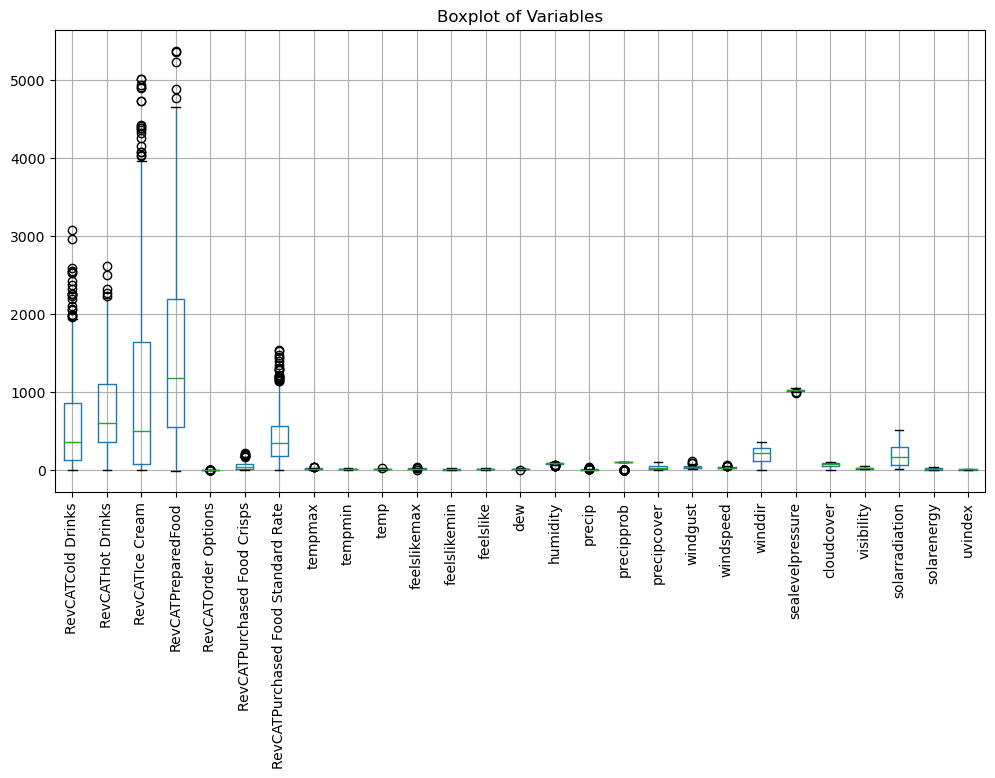

In [56]:
outliers_analysis_data = mergedcateringrev.copy()
outliers_analysis_data = outliers_analysis_data.drop(['snow', 'snowdepth'], axis=1)
outliers_analysis_data.boxplot(figsize=(12, 6))
plt.title('Boxplot of Variables')
plt.xticks(rotation=90)
plt.show()

In [57]:
outliers_analysis_data.describe()

,RevCATCold Drinks,RevCATHot Drinks,RevCATIce Cream,RevCATPreparedFood,RevCATOrder Options,RevCATPurchased Food Crisps,RevCATPurchased Food Standard Rate,tempmax,tempmin,temp,...,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,580.338127,751.398485,1050.802066,1482.886446,0.143857,51.512121,416.658953,14.070799,8.058953,11.005785,...,29.603058,39.589256,24.083747,199.044904,1016.806612,63.479890,22.112397,186.356198,10.062259,4.837466
std,618.581002,562.528151,1294.419696,1228.144532,0.463976,46.209461,335.037563,5.255061,4.316805,4.623319,...,28.247683,15.356699,9.303183,95.403063,9.712452,27.985957,9.104861,130.308573,8.181338,3.203680
min,-1.500000,0.000000,0.000000,-9.900000,0.000000,0.000000,0.000000,1.800000,-3.200000,-1.000000,...,0.000000,13.000000,7.500000,0.000000,986.000000,0.000000,4.200000,10.300000,0.300000,0.000000
25%,128.075000,350.635000,75.710000,552.600000,0.000000,15.390000,182.605000,10.000000,4.850000,8.000000,...,4.170000,27.350000,16.900000,116.250000,1010.300000,44.850000,15.100000,65.350000,2.550000,2.000000
50%,360.810000,603.770000,496.520000,1173.480000,0.000000,37.720000,341.670000,14.400000,8.100000,11.300000,...,25.000000,37.400000,22.500000,216.300000,1017.400000,69.200000,20.700000,163.300000,8.100000,5.000000
75%,853.225000,1095.190000,1640.380000,2191.875000,0.000000,75.025000,561.680000,17.250000,11.300000,14.000000,...,50.000000,48.950000,29.600000,273.050000,1023.650000,87.450000,28.100000,285.650000,16.200000,8.000000
max,3066.940000,2612.140000,5008.740000,5371.200000,3.000000,211.100000,1534.380000,30.500000,18.000000,23.900000,...,100.000000,115.900000,55.300000,358.600000,1041.100000,100.000000,45.900000,503.600000,29.700000,10.000000


In [58]:
for col in outliers_analysis_data.columns:
    if 'RevCAT' in col:
        for i in range(len(outliers_analysis_data[col])):
            if outliers_analysis_data[col][i] < 0:
                print(col, i,outliers_analysis_data[col][i])
                outliers_analysis_data[col][i] = 0
outliers_analysis_data.describe()

RevCATCold Drinks 15 -1.5
RevCATPreparedFood 15 -9.9


/tmp/ipykernel_133707/2619946898.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_analysis_data[col][i] = 0


,RevCATCold Drinks,RevCATHot Drinks,RevCATIce Cream,RevCATPreparedFood,RevCATOrder Options,RevCATPurchased Food Crisps,RevCATPurchased Food Standard Rate,tempmax,tempmin,temp,...,precipcover,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
count,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,...,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000,363.000000
mean,580.342259,751.398485,1050.802066,1482.913719,0.143857,51.512121,416.658953,14.070799,8.058953,11.005785,...,29.603058,39.589256,24.083747,199.044904,1016.806612,63.479890,22.112397,186.356198,10.062259,4.837466
std,618.577110,562.528151,1294.419696,1228.111400,0.463976,46.209461,335.037563,5.255061,4.316805,4.623319,...,28.247683,15.356699,9.303183,95.403063,9.712452,27.985957,9.104861,130.308573,8.181338,3.203680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000,-3.200000,-1.000000,...,0.000000,13.000000,7.500000,0.000000,986.000000,0.000000,4.200000,10.300000,0.300000,0.000000
25%,128.075000,350.635000,75.710000,552.600000,0.000000,15.390000,182.605000,10.000000,4.850000,8.000000,...,4.170000,27.350000,16.900000,116.250000,1010.300000,44.850000,15.100000,65.350000,2.550000,2.000000
50%,360.810000,603.770000,496.520000,1173.480000,0.000000,37.720000,341.670000,14.400000,8.100000,11.300000,...,25.000000,37.400000,22.500000,216.300000,1017.400000,69.200000,20.700000,163.300000,8.100000,5.000000
75%,853.225000,1095.190000,1640.380000,2191.875000,0.000000,75.025000,561.680000,17.250000,11.300000,14.000000,...,50.000000,48.950000,29.600000,273.050000,1023.650000,87.450000,28.100000,285.650000,16.200000,8.000000
max,3066.940000,2612.140000,5008.740000,5371.200000,3.000000,211.100000,1534.380000,30.500000,18.000000,23.900000,...,100.000000,115.900000,55.300000,358.600000,1041.100000,100.000000,45.900000,503.600000,29.700000,10.000000


## Special dates Analysis

Got the dates for Bank holidays which would have peak visitor footfall in the zoo 


In [59]:
bank_holidays = ['2022/01/03','2022/04/15','2022/05/02',
    '2022/06/02','2022/06/03','2022/12/26','2022/12/27']
consumption = mergedcateringrev.columns[mergedcateringrev.columns.str.contains('Rev')]
consumption_data = mergedcateringrev[consumption]
consumption_data['Date'] = mergedcateringrev['Date']
bank_holidays_data = consumption_data[consumption_data['Date'].isin(bank_holidays)]
bank_holidays_data = bank_holidays_data.reset_index(drop=True)
# bank_holidays_data = bank_holidays_data.set_index('Date')
bank_holidays_data

/tmp/ipykernel_133707/2980301480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumption_data['Date'] = mergedcateringrev['Date']


,RevCATCold Drinks,RevCATHot Drinks,RevCATIce Cream,RevCATPreparedFood,RevCATOrder Options,RevCATPurchased Food Crisps,RevCATPurchased Food Standard Rate,Date
0,324.04,854.45,357.84,1533.15,0.5,76.11,463.95,2022-01-03
1,1724.53,1396.18,4152.33,3334.28,0.0,144.26,833.09,2022-04-15
2,1085.36,1629.28,1927.53,3173.20,0.0,150.79,744.20,2022-05-02
3,1854.87,1527.57,4888.37,4315.48,0.0,128.50,1105.42,2022-06-02
4,1830.59,1467.72,3942.19,3788.41,0.0,139.95,1035.17,2022-06-03
5,126.37,394.02,28.46,485.39,0.0,7.24,206.09,2022-12-26
6,181.64,501.86,33.03,784.64,0.0,17.24,272.64,2022-12-27


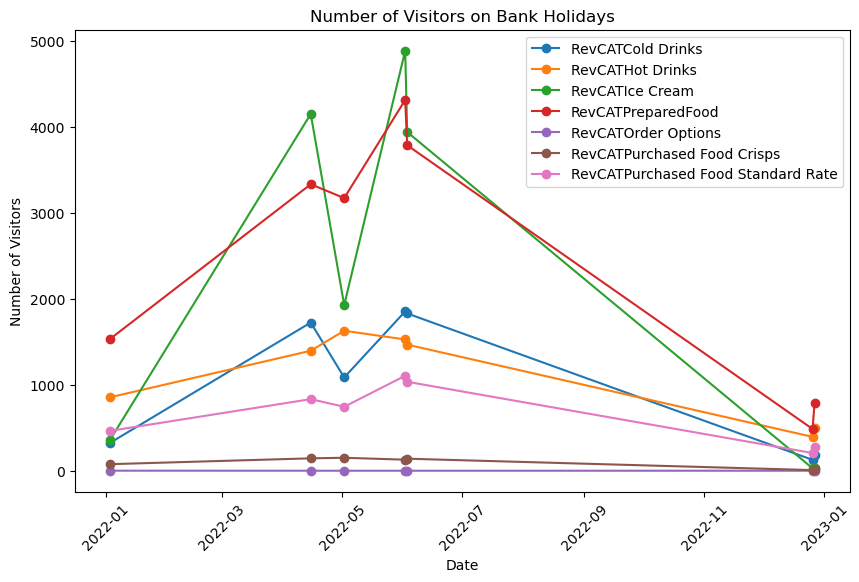

In [60]:
plt.figure(figsize=(10, 6))
for col in bank_holidays_data.columns:
    if col != 'Date':
        plt.plot(bank_holidays_data['Date'],bank_holidays_data[col],label=col,marker='o')
    
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.title('Number of Visitors on Bank Holidays')
plt.xticks(rotation=45)
plt.legend()
plt.show()